### This project analyses 10000 plus movies data sourced from TMDB and try to get answers of following questions:

1. What is the Correlation between movies<br/>
    a. budget and revenue<br/>
    b. budget and vote_average<br/>
2. What is the decade vise vote_average trend?<br/>
3. Which are Top 5 highest vote average Productions?<br/>
4. Which are Top 5 average budget (Spending) Productions?<br/>
5. Which are Top 5 average revenue Productions?<br/>
6. Which are Top 5 Movie Genres based on number of movies of the genres made? <br/>
7. Geners of top 50 vote average movies to see which genre is more common in top 50 vote avg movies?<br/>
8. As Action looks to be one of the high spending gener, trying to find out how top 20 Action movies spending was over the years. Is average Action movies spending growing over th years?<br/>
9. Which Action movie(s) has/have caused this peak in spending in 2010?

In [719]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [720]:
df_movies_start = pd.read_csv('tmdb-movies.csv')

In [721]:
df_movies_start.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [722]:
df_movies_start.shape

(10866, 21)

In [723]:
df_movies_start[df_movies_start['budget'].isna()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [724]:
df_movies_start[df_movies_start['revenue'].isna()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [725]:
df_movies_start.budget.corr(df_movies_start.revenue)

0.7349006819076118

In [726]:
df_movies_start[df_movies_start['vote_average'].isna()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [727]:
df_movies_start.budget.corr(df_movies_start.vote_average)

0.08101402185049406

In [728]:
df_movies_start.budget.corr(df_movies_start.runtime)

0.19128265656578045

In [729]:
df_movies_start.runtime.corr(df_movies_start.vote_average)

0.1568351780081676

### What is the decade vise vote_average trend ?<br/>
There is a possibility that average vote may reduce/get leveled with more number of samples, so plotting this vis-a-vis number of votes 

In [730]:
df_60s = df_movies_start[(df_movies_start.release_year >= 1960) & (df_movies_start.release_year < 1970)]
df_70s = df_movies_start[(df_movies_start.release_year >= 1970) & (df_movies_start.release_year < 1980)]
df_80s = df_movies_start[(df_movies_start.release_year >= 1980) & (df_movies_start.release_year < 1990)]
df_90s = df_movies_start[(df_movies_start.release_year >= 1990) & (df_movies_start.release_year < 2000)]
df_2000s = df_movies_start[(df_movies_start.release_year >= 2000) & (df_movies_start.release_year < 2010)]
df_2010s = df_movies_start[(df_movies_start.release_year >= 2010) & (df_movies_start.release_year < 2020)]

In [731]:
decade_avg_vote = np.array([df_60s['vote_average'].mean(), df_70s['vote_average'].mean(), df_80s['vote_average'].mean(), df_90s['vote_average'].mean(), 
df_2000s['vote_average'].mean(), df_2010s['vote_average'].mean()])

In [732]:
decade_total_vote_count = np.array([df_60s['vote_count'].sum(), df_70s['vote_count'].sum(), df_80s['vote_count'].sum(), df_90s['vote_count'].sum(), 
df_2000s['vote_count'].sum(), df_2010s['vote_count'].sum()])

In [733]:
decade_total_vote_count

array([  25563,   55472,  130753,  316218,  781854, 1052297], dtype=int64)

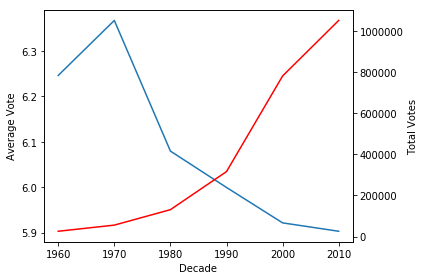

In [734]:
decade_vote_df = pd.DataFrame.from_dict({'vote_avg': decade_avg_vote,  'decade': np.array(['1960', '1970', '1980', '1990', '2000','2010']), 'vote_count': decade_total_vote_count})
fig, ax1 = plt.subplots()
ax1.plot(decade_vote_df.decade,decade_vote_df.vote_avg)
ax1.set_xlabel('Decade')
ax1.set_ylabel('Average Vote')
ax2=ax1.twinx()
ax2.plot(decade_vote_df.decade,decade_vote_df.vote_count, color='r')
ax2.set_ylabel('Total Votes')
fig.tight_layout()

#### Finding: Seems 1970s Movies received highest average_votes

### Top 5 Vote_Average Productions

In [735]:
movies_grouped_production = df_movies_start.groupby('production_companies', sort=True)

In [736]:
production_with_mean_vote = movies_grouped_production['vote_average'].agg(np.mean)

In [737]:
production_with_mean_vote.sort_values(ascending=False).head(5)

production_companies
SMV Enterprises|Columbia Music Video|EMI              8.7
Edel records GmbH                                     8.5
Red Bull Media House|Brain Farm Digital Cinema        8.5
Miramax Films|British Film Institute (BFI)            8.5
Blumhouse Productions|Hit the Ground Running Films    8.4
Name: vote_average, dtype: float64

### Top 5 average budget (Spending) Productions

In [738]:
production_with_mean_budget = movies_grouped_production['budget'].agg(np.mean)

In [739]:
production_with_mean_budget.sort_values(ascending=False).head(5)

production_companies
Boram Entertainment Inc.                                                     425000000.0
Walt Disney Pictures|Jerry Bruckheimer Films|Moving Picture Company (MPC)    380000000.0
Marvel Studios|Prime Focus|Revolution Sun Studios                            280000000.0
DC Comics|Legendary Pictures|Warner Bros.|Bad Hat Harry Productions          270000000.0
Columbia Pictures|Laura Ziskin Productions|Marvel Enterprises                258000000.0
Name: budget, dtype: float64

### Top 5 average revenue Productions

In [740]:
production_with_mean_revenue = movies_grouped_production['revenue'].agg(np.mean)

In [741]:
production_with_mean_revenue.sort_values(ascending=False).head(5)

production_companies
Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment    2.781506e+09
Lucasfilm|Truenorth Productions|Bad Robot                                                                     2.068178e+09
Paramount Pictures|Twentieth Century Fox Film Corporation|Lightstorm Entertainment                            1.845034e+09
Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu                      1.513529e+09
Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films                                   1.506249e+09
Name: revenue, dtype: float64

#### Above Top 5 productions stats pulled out to see if Productions who have higher spending are also the one getting higher vote average. Also, to see if Productions with higher spending are also the one with higher revenue 

### Top 5 Movie Genres based on number of movies of the genres made

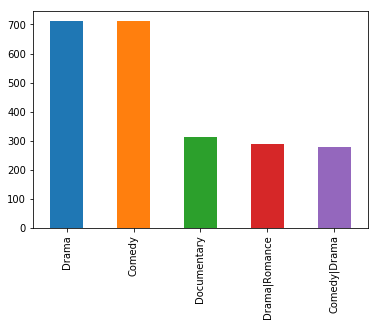

In [742]:
df_movies_start['genres'].value_counts()
df_movies_start['genres'].value_counts().head(5).plot(kind = 'bar')

### Geners of top 50 vote average movies to see which genre is more in top 50 vote avg movies

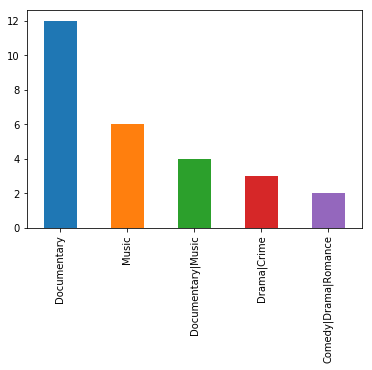

In [743]:
top_50_high_voted = df_movies_start.vote_average.sort_values(ascending=False).head(50)
df_movies_top_50 = df_movies_start.iloc[top_50_high_voted.index.tolist(), :]
df_movies_top_50['genres'].value_counts().head().plot(kind = 'bar')

### Which genre movie are in top 5 high budget? 

In [744]:
df_budget_genres = df_movies_start[['budget', 'genres','release_year']]
df_budget_genres[df_budget_genres.index.isin(df_budget_genres.budget.sort_values(ascending=False).head(100).index)].genres.value_counts().head()

Action|Adventure|Science Fiction            5
Action|Adventure|Fantasy                    5
Adventure|Fantasy|Action                    4
Action|Adventure|Fantasy|Science Fiction    4
Action|Science Fiction|Adventure            4
Name: genres, dtype: int64

#### Finding: Looks like Action gener is more common in top 5 high budget movies

### As Action looks to be one of the high spending gener, trying to find out how top 20 Action movies spending was over the years. Is average Action movies spending growing over th years?

In [745]:
df_budget_genres_withoutna = df_budget_genres.dropna()

In [746]:
Action_index_list = df_budget_genres_withoutna[df_budget_genres_withoutna.genres.str.contains('Action')].budget.sort_values(ascending=False).index

In [747]:
df_top20_budget_action = df_budget_genres_withoutna[df_budget_genres_withoutna.index.isin(Action_index_list[0:20])]

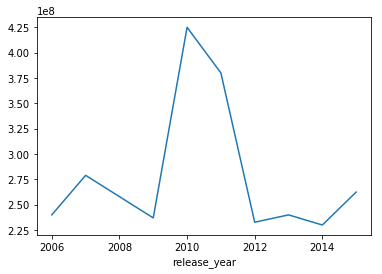

In [748]:
df_top20_budget_action.groupby('release_year', sort=True).budget.agg(np.mean).plot(kind='line')

## Which movie(s) has/have caused this peak in 2010?

In [749]:
df_movies_start[df_movies_start.index.isin(Action_index_list[0:20])][df_movies_start.release_year==2010]

C:\Users\Nafeez Quraishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,tt1032751,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.4,2010,425000000.0,11087569.0


### Actions movies seem to have one highest budget with some exceptions, and spending does not seem to have a definitive increasing or decreasing trend. In 2010 there is a exceptional high bump in budget seems to have caused due to spending in The Warrior's way. 

### https://www.decluttr.com/blog/2018/02/13/what-is-the-most-expensive-movie-ever-made/ mentions, highest ever budget movie had 400m budget. The Warrior's Way above looks to have $425m budget and based on the corresponding revenue it seems to be a big flop.